In [1]:
import pygame

HEIGHT = 224*4
WIDTH = 240*4
FPS = 60

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Moving ball")
clock = pygame.time.Clock()

ball = pygame.image.load("ball.gif")
ballrect = ball.get_rect()
ballrect.center = WIDTH/2, HEIGHT/2
speed = [2, 3]


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.rect.Rect(0,0,111,111)

<rect(0, 0, 111, 111)>

In [3]:
print(ball.get_rect())

<rect(0, 0, 111, 111)>


In [4]:
import numpy as np
z = np.load("1.npy")
from matplotlib import pyplot as plt
plt.imshow(z[0])

240 224


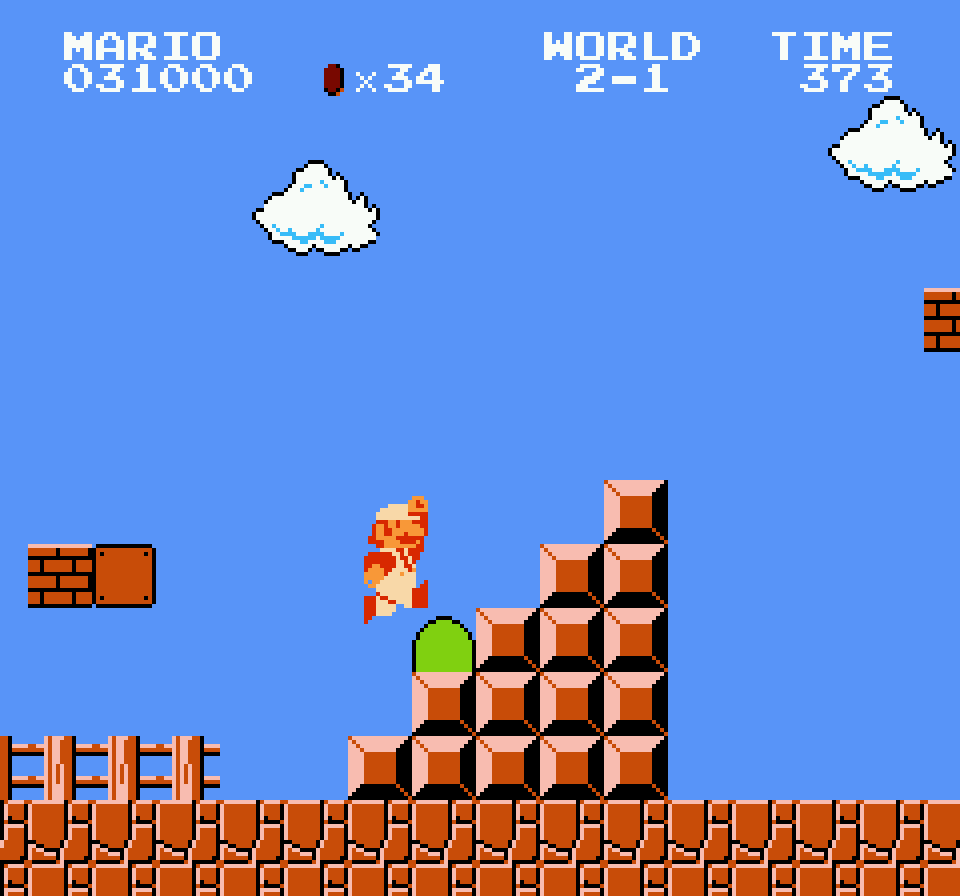

In [5]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
import PIL.Image

def zoom(img, zoom):
    w, h = img.size
    print(w,h)
    zoom2 = zoom * 2
    return img.resize((w*zoom, h*zoom), PIL.Image.NEAREST)

zoom(PIL.Image.fromarray(z[1000]), 4)

In [6]:
import scipy.ndimage
print(scipy.ndimage.zoom(z[0],(4,4,1)).shape)

(896, 960, 3)


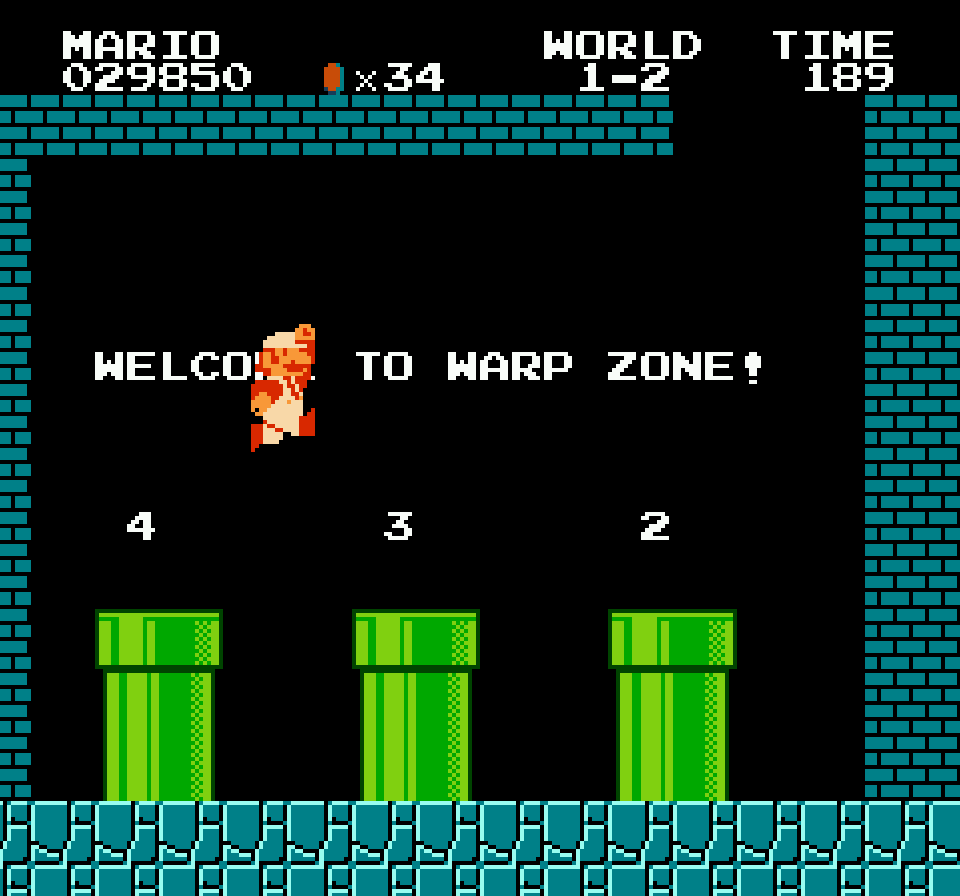

In [7]:
surf = scipy.ndimage.zoom(z[0],(4,4,1),order=0)
PIL.Image.fromarray(surf)

In [8]:

surf = pygame.surfarray.make_surface(surf)
surf = pygame.transform.rotate(surf, 90,)
surf = pygame.transform.flip(surf, 0, 1)
rect = pygame.rect.Rect(0,0,WIDTH,HEIGHT)

In [9]:

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

FLICKER=WHITE
timer = 0
pos_x, pos_y = 0, 0
pos_ux, pos_uy = 0, 0 # fsr this is off by a little. nno idea why
left, right, forward, backward = False, False, False, False
ka, ks, kw, kd = False, False, False, False
accel = 0
from pygame.locals import *

In [10]:
boxes = []

In [11]:
K_RETURN # select + create pattern + mark all other patterns in image
K_BACKSPACE # select/delete from patterns
K_ESCAPE # select mode

27

In [12]:
def draw_hollow_rect(screen, rcolor, box):
    sqrect = pygame.rect.Rect(box[0],box[1]-1,box[2]-4,4)
    sqrect2 = pygame.rect.Rect(box[0]-1,box[1],4,box[3]-4)
    sqrect3 = pygame.rect.Rect(box[2]+box[0]-4,box[1],4,box[3]-4)
    sqrect4 = pygame.rect.Rect(box[0],box[3]+box[1]-4,box[2],4)
    pygame.draw.rect(screen, rcolor, sqrect)
    pygame.draw.rect(screen, rcolor, sqrect2)
    pygame.draw.rect(screen, rcolor, sqrect3)
    pygame.draw.rect(screen, rcolor, sqrect4)    

In [13]:
pattern_mode = False
select_mode = True
patterns = []
pattern = [0]

In [14]:
def create_pattern_from_current_box(box):
    print(box)
#     x0 = min(box[1], box[3])
#     x1 = max(box[1], box[3])
#     y0 = min(box[0], box[2])
#     y1 = max(box[0], box[2])
    x0 = box[1]//4
    x1 = box[3]//4
    y0 = box[0]//4
    y1 = box[2]//4
    print(z[0,x0:x1+x0, y0:y1+y0].shape)
    return z[0,x0:x1+x0, y0:y1+y0]
    
def find_pattern(patterns):
    pass

display_image = []

In [15]:

while 1:
    print(pos_x, pos_y, pos_ux, pos_uy)
    for event in pygame.event.get():
        if event.type == pygame.QUIT: 
            quit()
        if event.type == KEYDOWN:
            if event.key == K_RETURN:
                pattern = create_pattern_from_current_box([pos_x, pos_y, pos_ux, pos_uy])
                patterns.append(pattern)
                display_image = PIL.Image.fromarray(pattern)
            if event.key == K_l:
                pattern = create_pattern_from_current_box([pos_x, pos_y, pos_ux, pos_uy])
                display_image = PIL.Image.fromarray(pattern)
            if event.key == K_ESCAPE:
                select_mode = not select_mode
                pattern_mode = not pattern_mode
            if event.key == K_SPACE:
                boxes.append([pos_x, pos_y, pos_ux, pos_uy])
            if event.key == K_w:
                kw = True
            elif event.key == K_a:
                ka = True
            elif event.key == K_s:
                ks = True
            elif event.key == K_d:
                kd = True
            elif event.key == K_LEFT:
                left = True
            elif event.key == K_RIGHT:
                right = True
            elif event.key == K_UP:
                forward = True
            elif event.key == K_DOWN:
                backward = True

        if event.type == KEYUP:
            accel = 0
            if event.key == K_w:
                kw = False
            elif event.key == K_a:
                ka = False
            elif event.key == K_s:
                ks = False
            elif event.key == K_d:
                kd = False
            elif event.key == K_LEFT:
                left = False
            elif event.key == K_RIGHT:
                right = False
            elif event.key == K_UP:
                forward = False
            elif event.key == K_DOWN:
                backward = False
    if left or right or forward or backward or kd or ka or ks or kw:
        accel += 1
    timer+=1
    if accel == 1 or accel == 10 or accel == 20 or accel == 30 or accel == 35 or accel == 38 or accel > 42:
        if ka:
            pos_ux -= 4
        elif kd:
            pos_ux += 4
        if kw:
            pos_uy -= 4
        elif ks:
            pos_uy += 4
        if left:
            pos_x -= 4
        elif right:
            pos_x += 4
        if backward:
            pos_y += 4
        elif forward:
            pos_y -= 4
    screen.fill(WHITE)
    screen.blit(surf, rect)
    draw_hollow_rect(screen, FLICKER, [pos_x, pos_y, pos_ux, pos_uy])
    for box in boxes:
        draw_hollow_rect(screen, FLICKER, box)
    # i should prob start refac soom
    if timer > 45:
        if FLICKER == BLACK:
            FLICKER = WHITE
        else:
            FLICKER = BLACK
        timer = 0
    pygame.display.flip()
    clock.tick(FPS)

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 24
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 32 28 28
64 3

KeyboardInterrupt: 

In [16]:
zoom(display_image, 4)

7 7


In [17]:
patterns[-1]

array([[[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,  

In [18]:
import scipy.signal
p = scipy.signal.correlate(pattern,z[0],mode="valid")
p.shape
p.squeeze().shape
np.max(p.squeeze())
np.where(p.squeeze() == 240)

(array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   5,   5,   5,   5,
          5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   6,   6,
          6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
          9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
          9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
          9,   9,   9,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,
         11,  11,  11,  11,  11,  12,  12,  12,  12,  12,  12,  12,  12,
         12,  12,  12,  12,  12,  12,  12,  17,  17,  17,  17,  17,  17,
         17,  17,  17,  17,  17,  17,  17,  17,  17

234 218


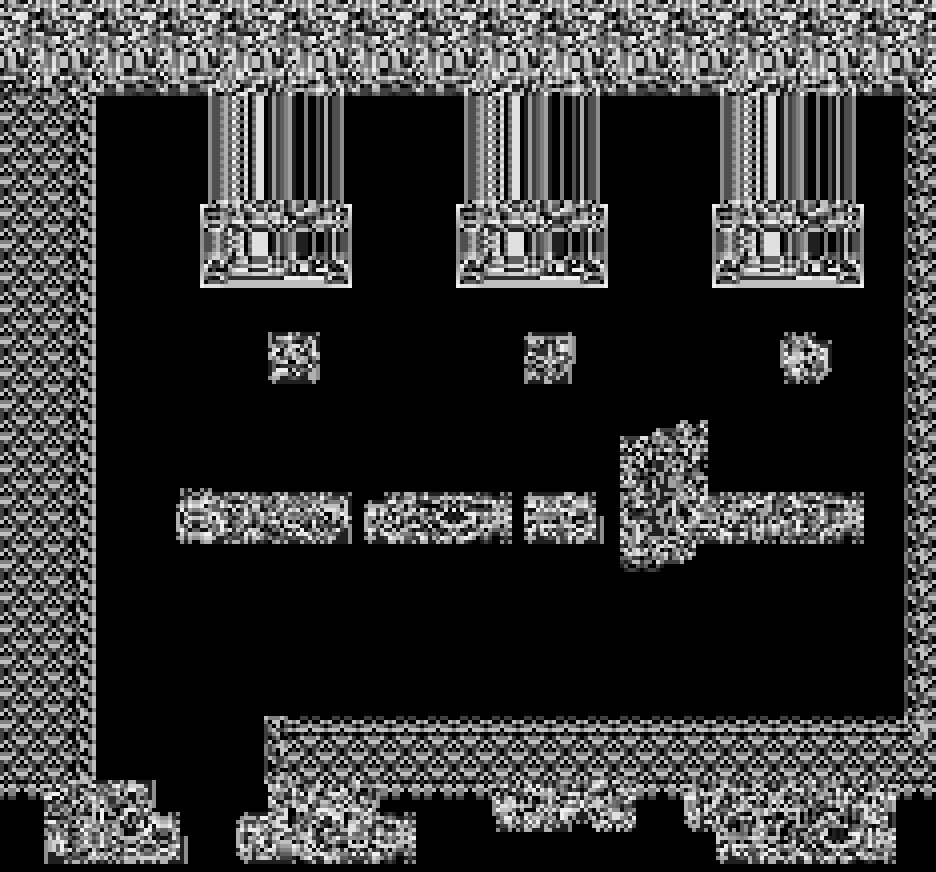

In [20]:
zoom(PIL.Image.fromarray(p.squeeze()),4)
# zoom(PIL.Image.fromarray(scipy.signal.correlate(z[0],pattern,mode="valid").flatten()),4)

In [19]:
pattern


array([[[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [  0,   0,   0],
        [248, 252, 248],
        [248, 252, 248]],

       [[248, 252, 248],
        [248, 252, 248],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,  

In [21]:
import cv2

result = cv2.matchTemplate(
    z[0].astype(np.float32),
    pattern.astype(np.float32),
    cv2.TM_SQDIFF)

positions = np.argwhere(result == 0.0)
positions

array([[  8,  16],
       [  8, 208]])